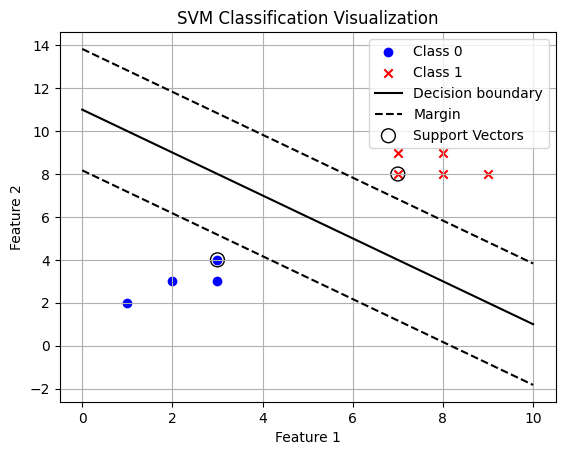

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Sample data: two classes in 2D
X = np.array([
    [2, 3], [3, 3], [3, 4], [5, 6], [1, 2],  # Class 0 (blue)
    [7, 8], [8, 8], [9, 8], [8, 9], [7, 9]   # Class 1 (red)
])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Train SVM with linear kernel
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Get the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]
x_plot = np.linspace(0, 10, 100)
y_plot = -(w[0] / w[1]) * x_plot - b / w[1]

# Plot points
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', marker='o', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', marker='x', label='Class 1')

# Plot decision boundary
plt.plot(x_plot, y_plot, 'k-', label='Decision boundary')

# Plot margins (lines parallel to decision boundary at distance = 1 / ||w||)
margin = 1 / np.linalg.norm(w)
y_margin_up = y_plot + margin
y_margin_down = y_plot - margin
plt.plot(x_plot, y_margin_up, 'k--', label='Margin')
plt.plot(x_plot, y_margin_down, 'k--')

# Highlight support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classification Visualization')
plt.grid(True)
plt.show()

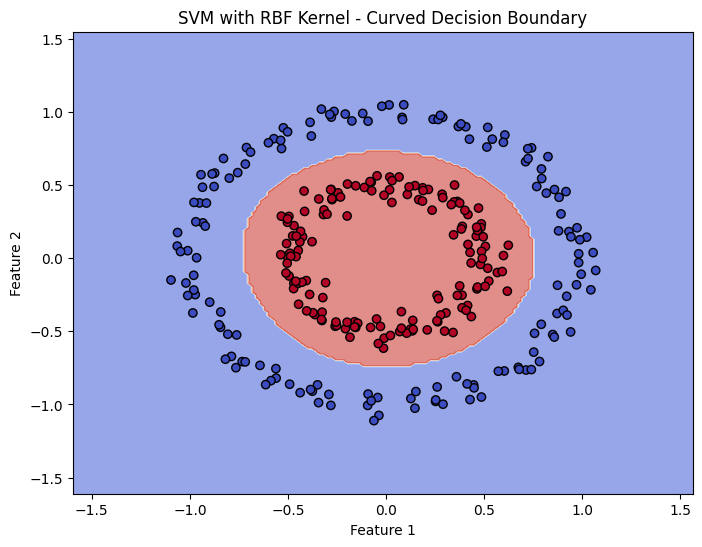

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# Generate non-linearly separable data (two circles)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Train an SVM with RBF kernel
clf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf.fit(X, y)

# Plot the decision boundary
def plot_decision_boundary(clf, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("SVM with RBF Kernel - Curved Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(clf, X, y)